# Moving Averages For Competitors
# Shopify Stock

In [1]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import math
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
plt.rcParams['figure.figsize'] = (15, 9)
%matplotlib inline
import pandas_datareader as web
import datetime

In [4]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
shop_df = web.DataReader('SHOP', 'yahoo', start, end)
shop = shop_df.copy()


In [5]:
shop_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000
2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000
2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999
2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000
2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000


In [6]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1163 entries, 2015-05-20 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1163 non-null   float64
 1   Low        1163 non-null   float64
 2   Open       1163 non-null   float64
 3   Close      1163 non-null   float64
 4   Volume     1163 non-null   int64  
 5   Adj Close  1163 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 63.6 KB


# 20, 100 Days SMA


In [7]:
shop_df["20d_sma"]=np.round(shop_df["Close"].rolling(window=20,center=False).mean(),5)
shop_df["100d_sma"]=np.round(shop_df["Close"].rolling(window=100,center=False).mean(),5)
shop_df.fillna(0,inplace=True)
shop_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,20d_sma,100d_sma
Date,,,,,,,,
2019-12-03,351.309998,320.000000,321.010010,350.660004,3269800,350.660004,316.0670,333.9937
2019-12-04,376.910004,349.510010,350.000000,372.000000,5600800,372.000000,319.8920,334.4735
2019-12-05,376.589996,360.260010,371.029999,363.589996,3242200,363.589996,323.3205,334.9355
2019-12-06,372.290009,360.750000,367.799988,364.600006,2198700,364.600006,327.2630,335.3283
2019-12-09,381.109985,364.000000,365.179993,369.790009,4074600,369.790009,330.8705,335.7147
2019-12-10,373.970001,364.545990,373.510010,368.000000,1514700,368.000000,334.1045,336.0947
2019-12-11,374.500000,365.510010,368.410004,373.079987,1837900,373.079987,337.4805,336.4731
2019-12-12,376.299988,364.910004,372.000000,372.049988,2171400,372.049988,340.3675,336.8914
2019-12-13,392.000000,370.450012,370.450012,385.570007,3257000,385.570007,344.0235,337.4514


Text(0, 0.5, 'Price in $')

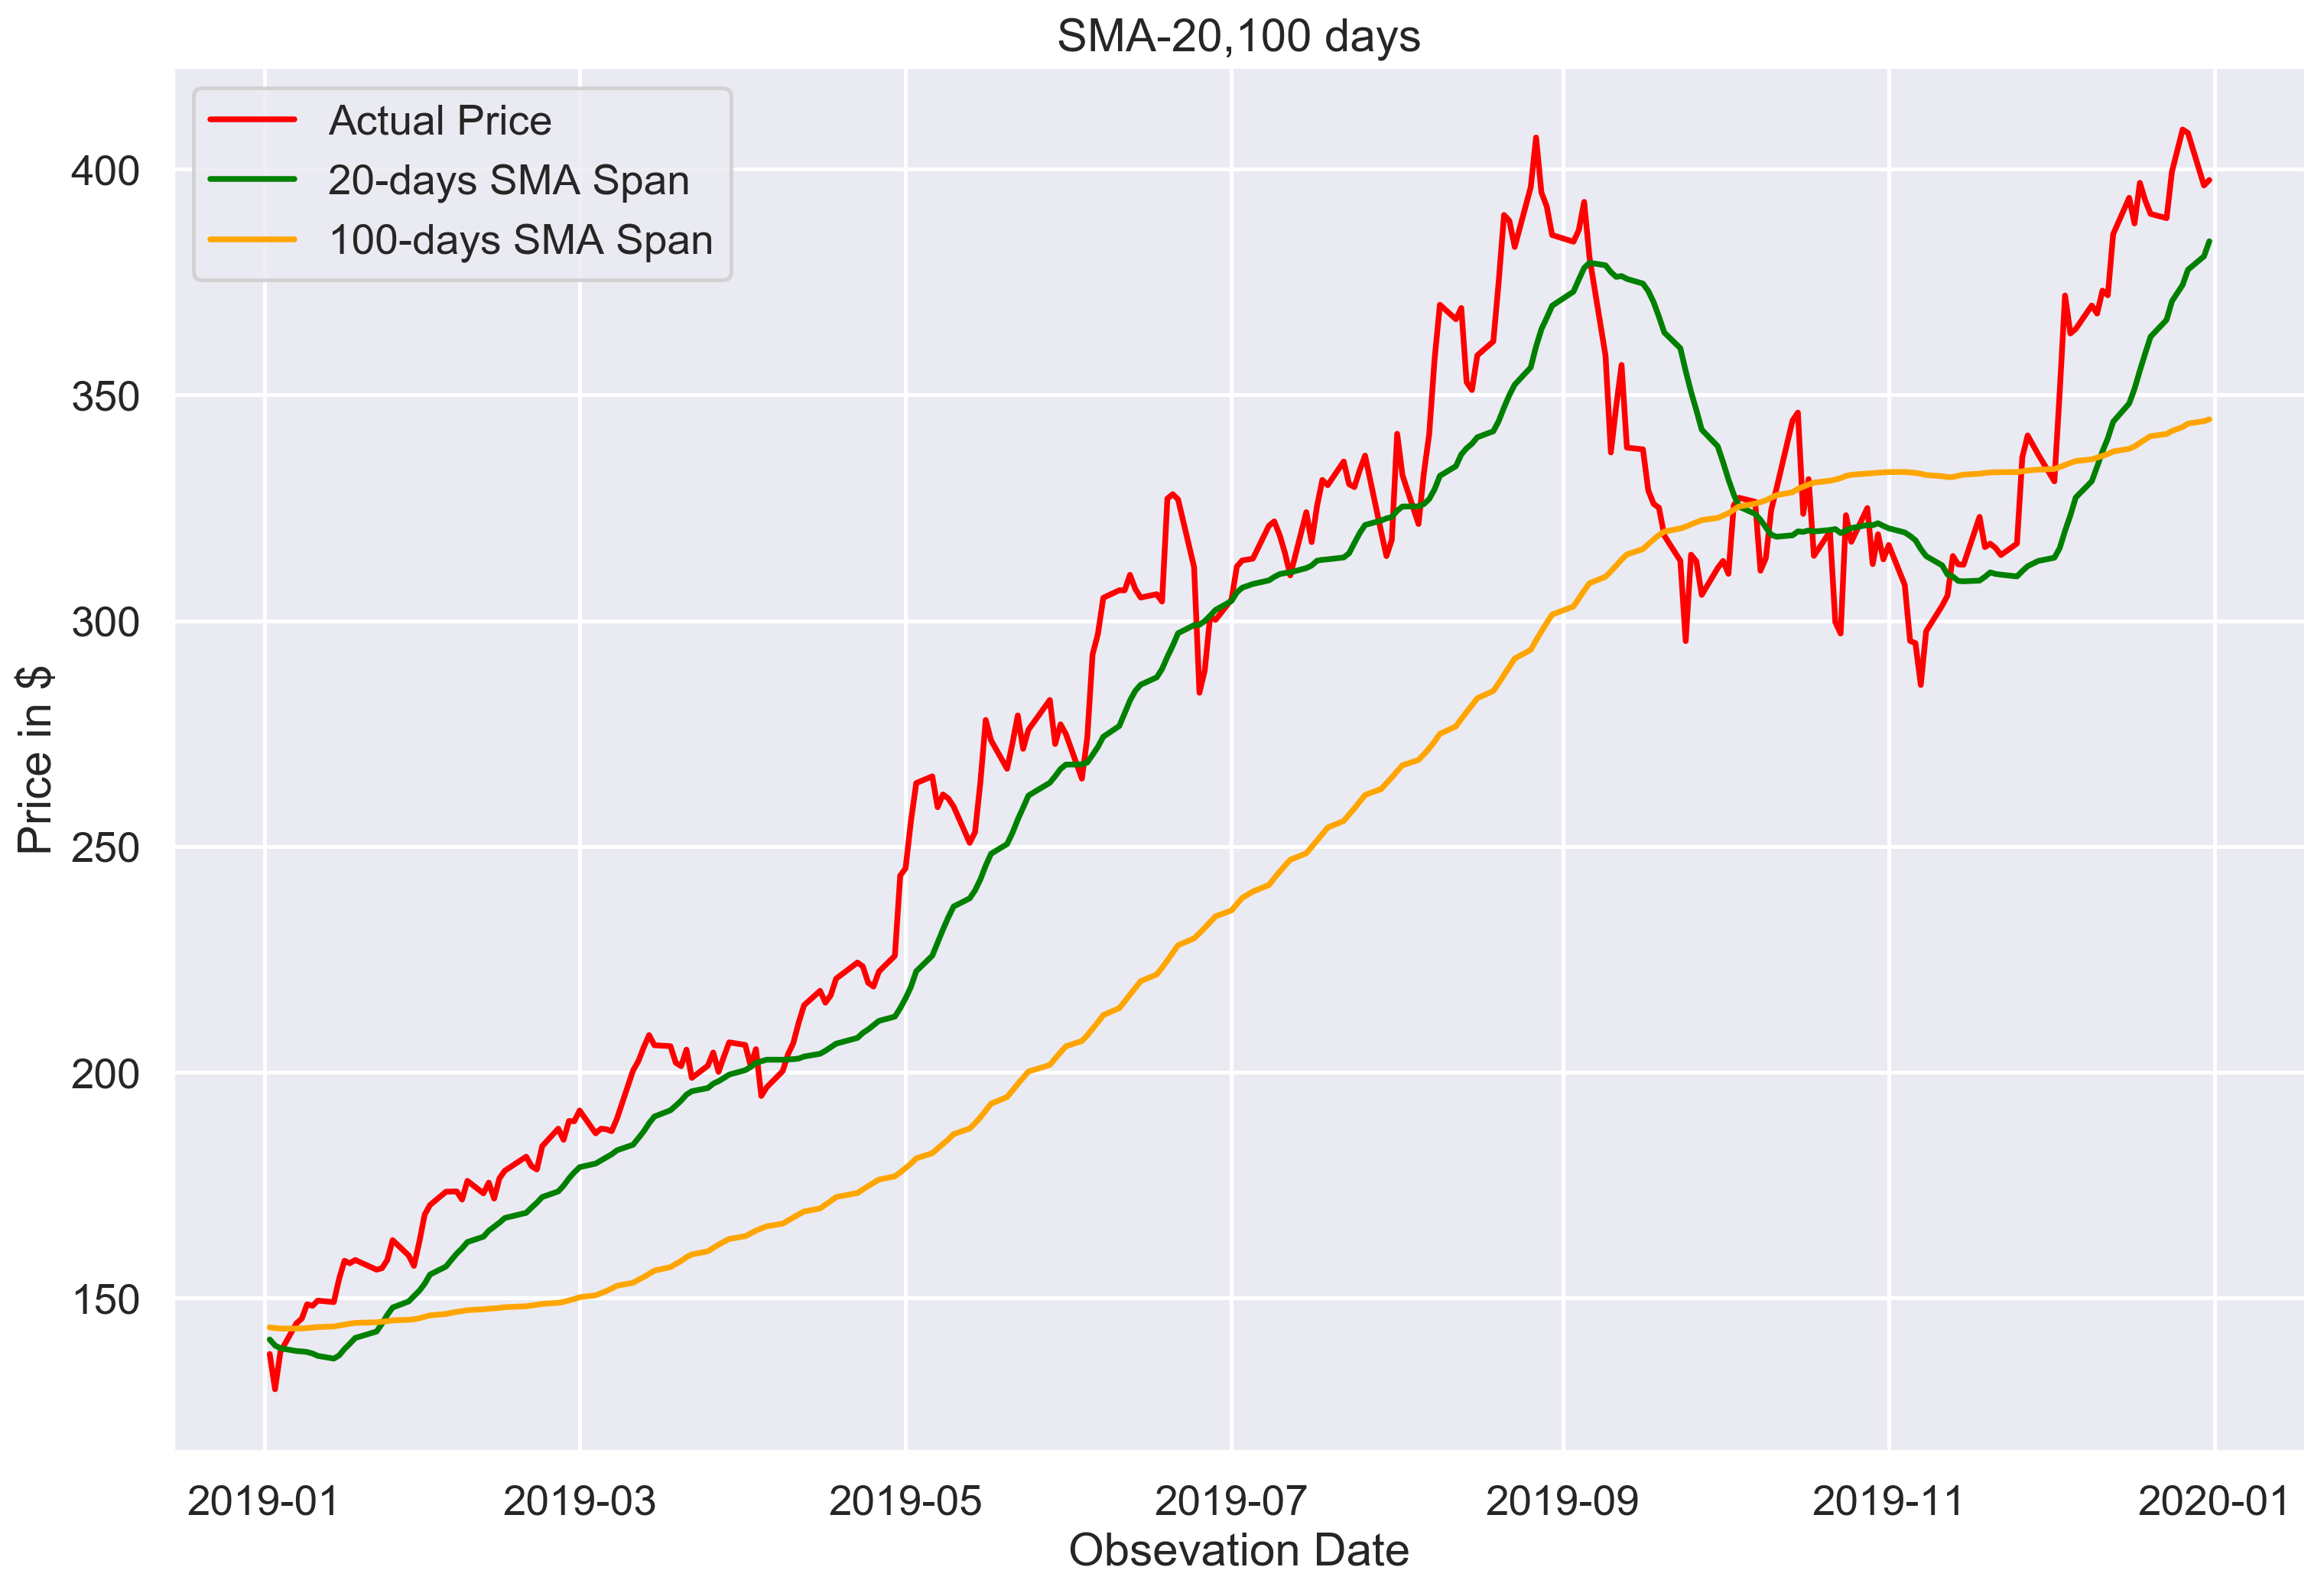

In [8]:
start_date = '2019-01-01'
end_date = '2020-01-01'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(shop_df.loc[start_date:end_date, :].index, shop_df.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(shop_df.loc[start_date:end_date, :].index, shop_df.loc[start_date:end_date, '20d_sma'], label = '20-days SMA Span', color = 'green')
ax.plot(shop_df.loc[start_date:end_date, :].index, shop_df.loc[start_date:end_date, '100d_sma'], label = '100-days SMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('SMA-20,100 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

# 20, 100 Days EMA

Text(0, 0.5, 'Price in $')

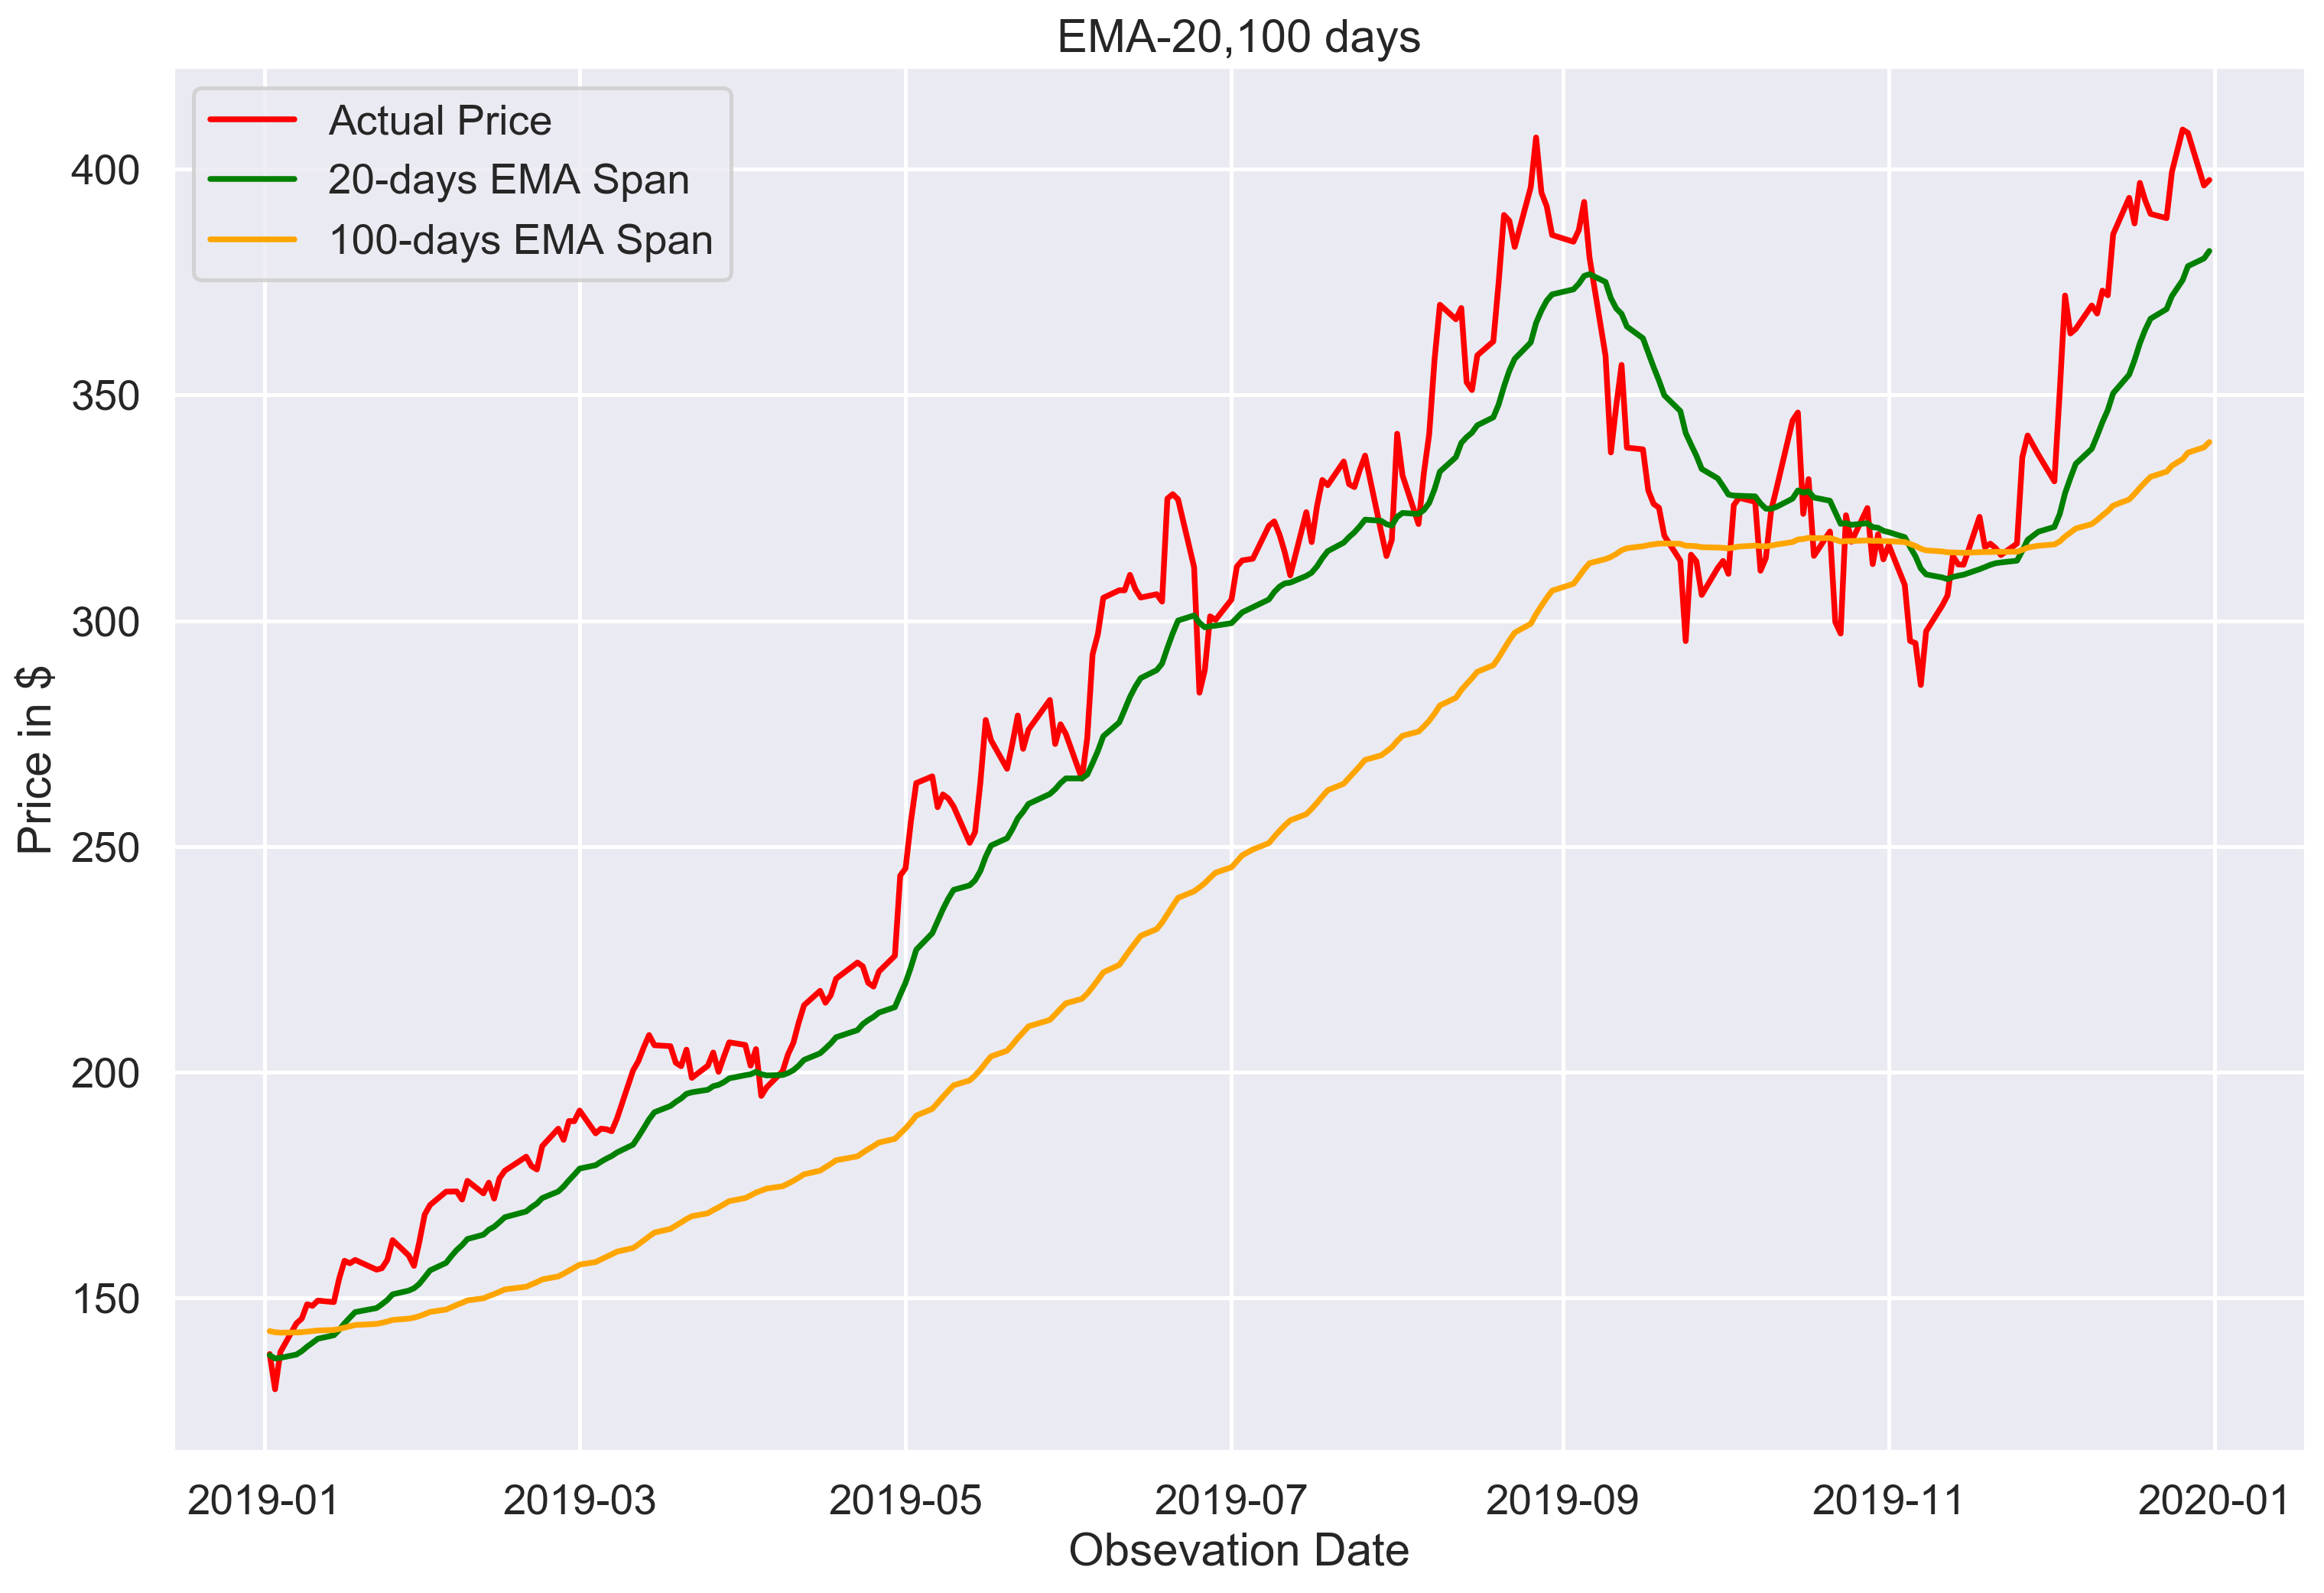

In [9]:
ema_20= shop.ewm(span=20, adjust=False).mean()
ema_100 = shop.ewm(span=100, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(shop.loc[start_date:end_date, :].index, shop.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(ema_100.loc[start_date:end_date, :].index, ema_100.loc[start_date:end_date, 'Close'], label = '100-days EMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('EMA-20,100 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

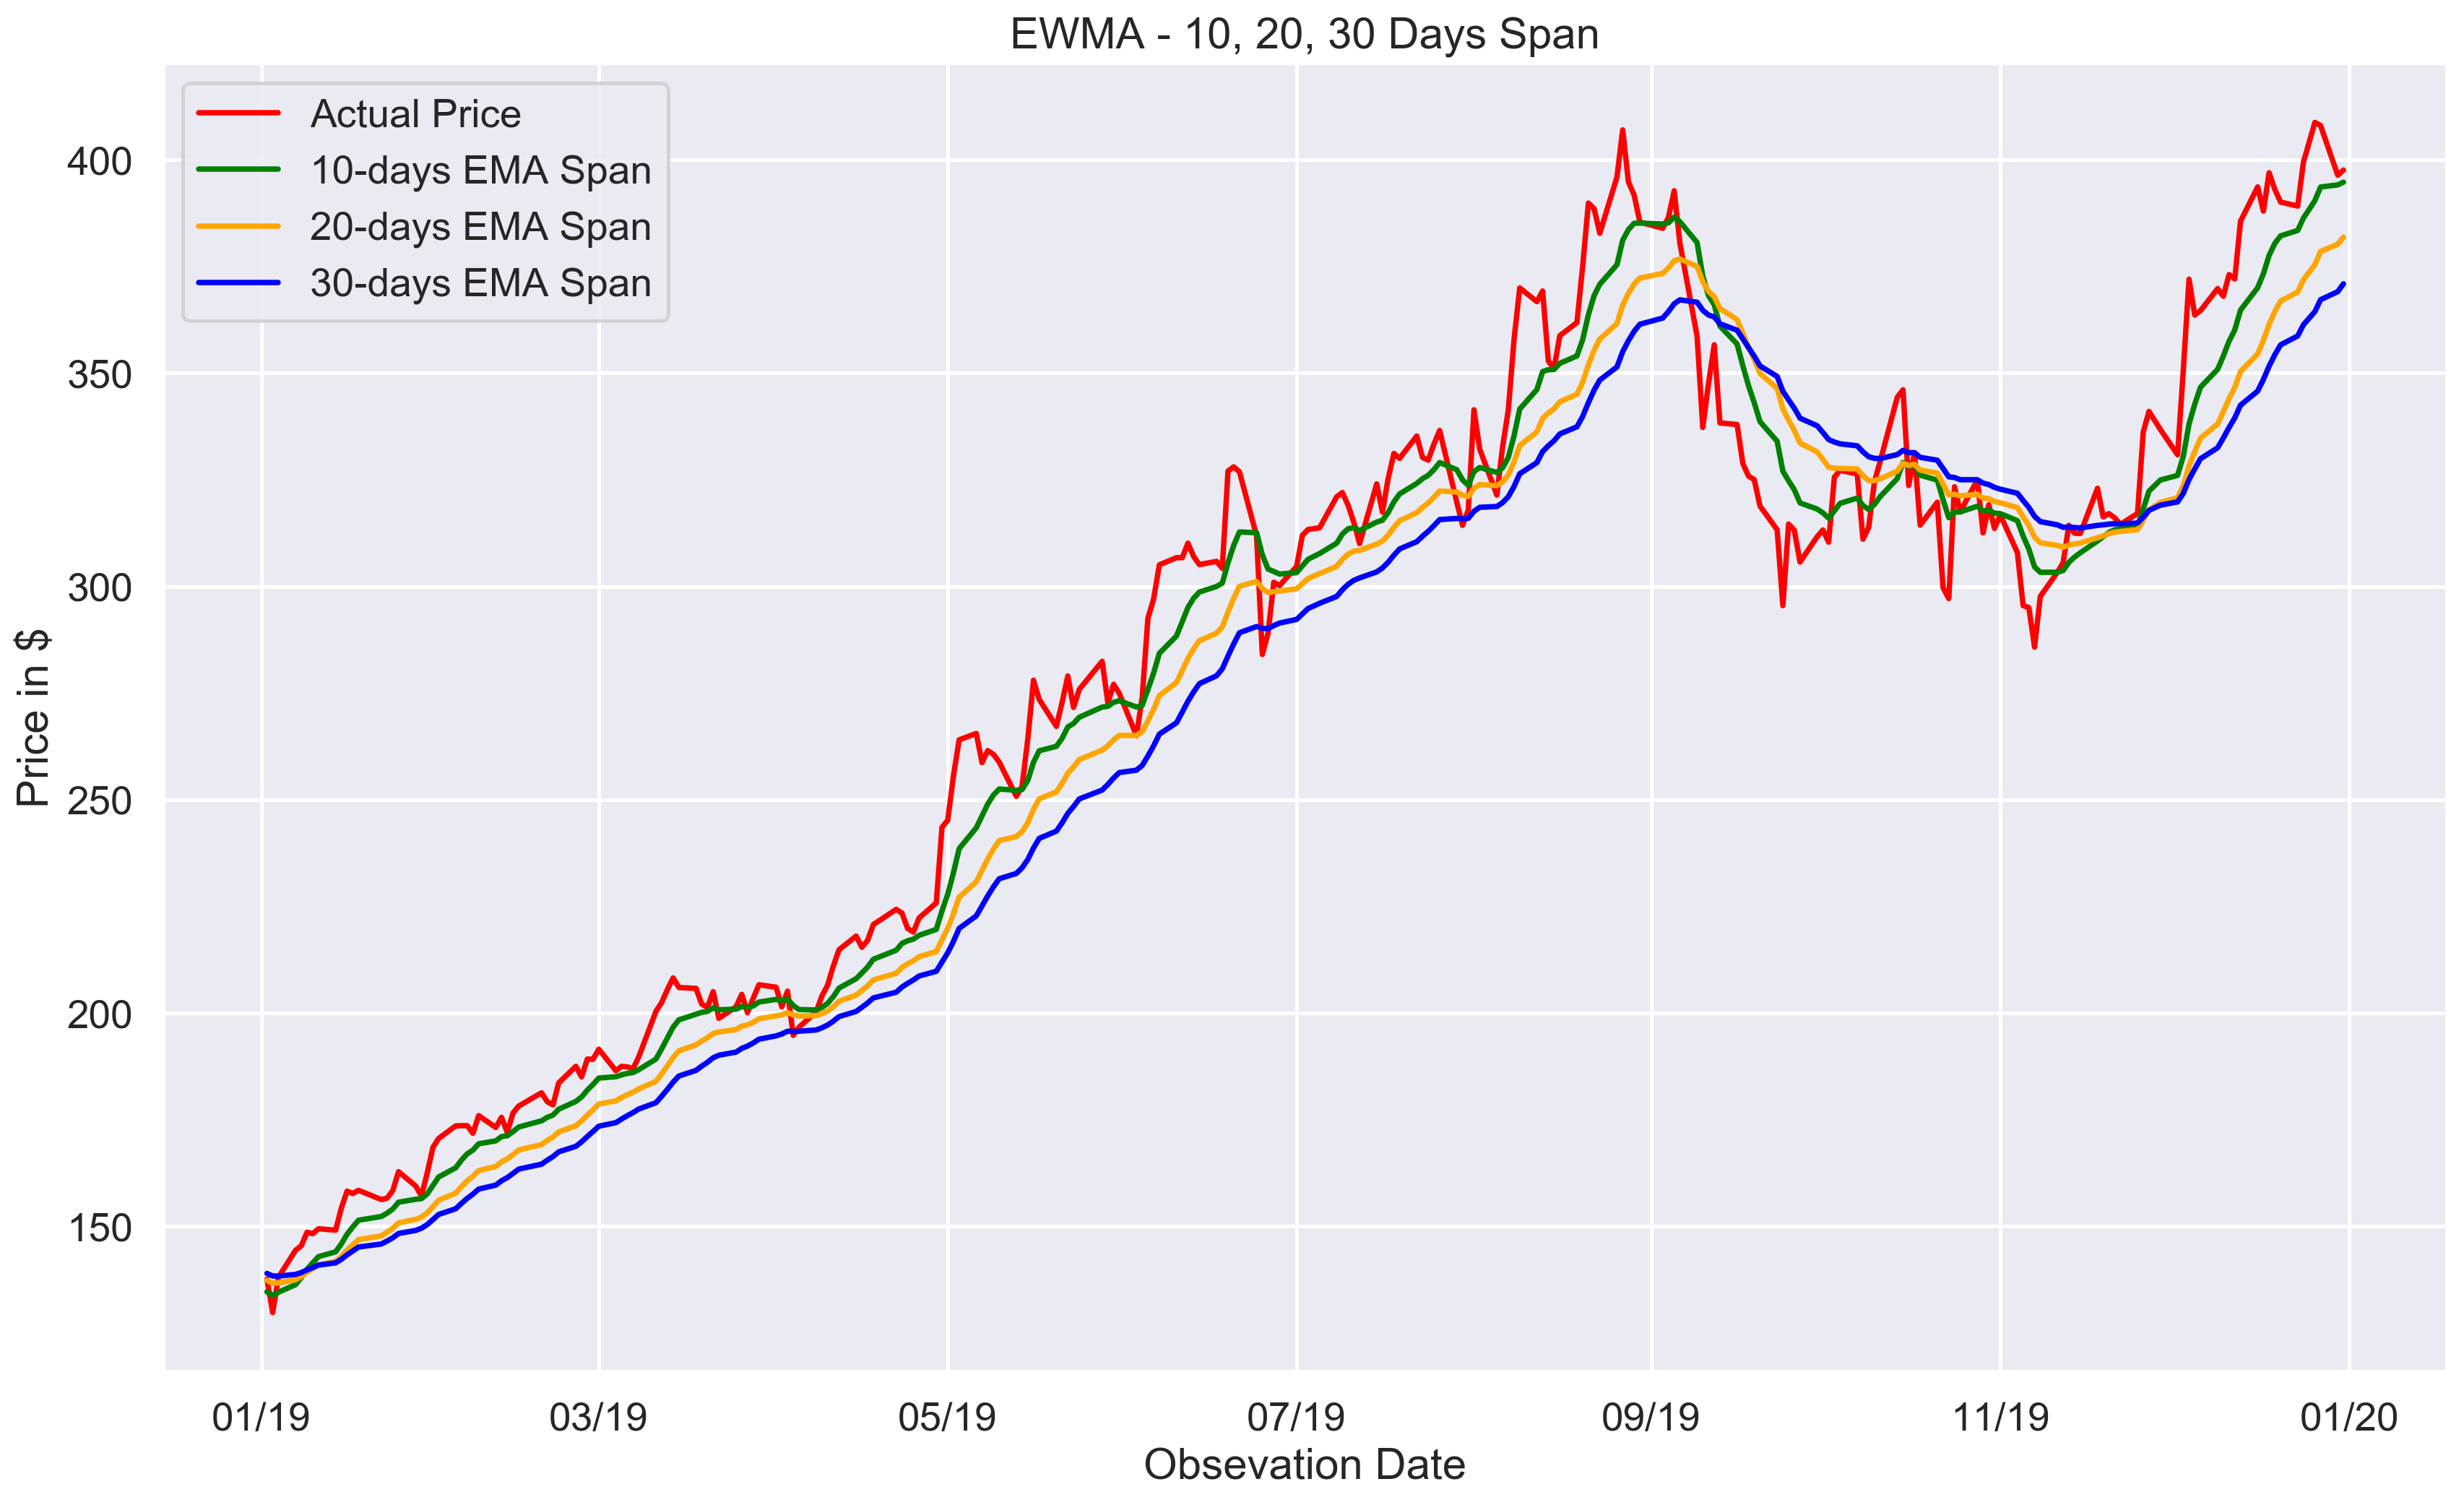

In [10]:
ema_10 = shop.ewm(span=10, adjust=False).mean()
ema_30 = shop.ewm(span=30, adjust=False).mean()

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(shop.loc[start_date:end_date, :].index, shop.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'green')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'orange')
ax.plot(ema_30.loc[start_date:end_date, :].index, ema_30.loc[start_date:end_date, 'Close'], label = '30-days EMA Span', color = 'blue')

ax.legend(loc='best')
ax.set_title('EWMA - 10, 20, 30 Days Span')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# 20 Days EMA vs 20 Days SMA


Text(0, 0.5, 'Price in $')

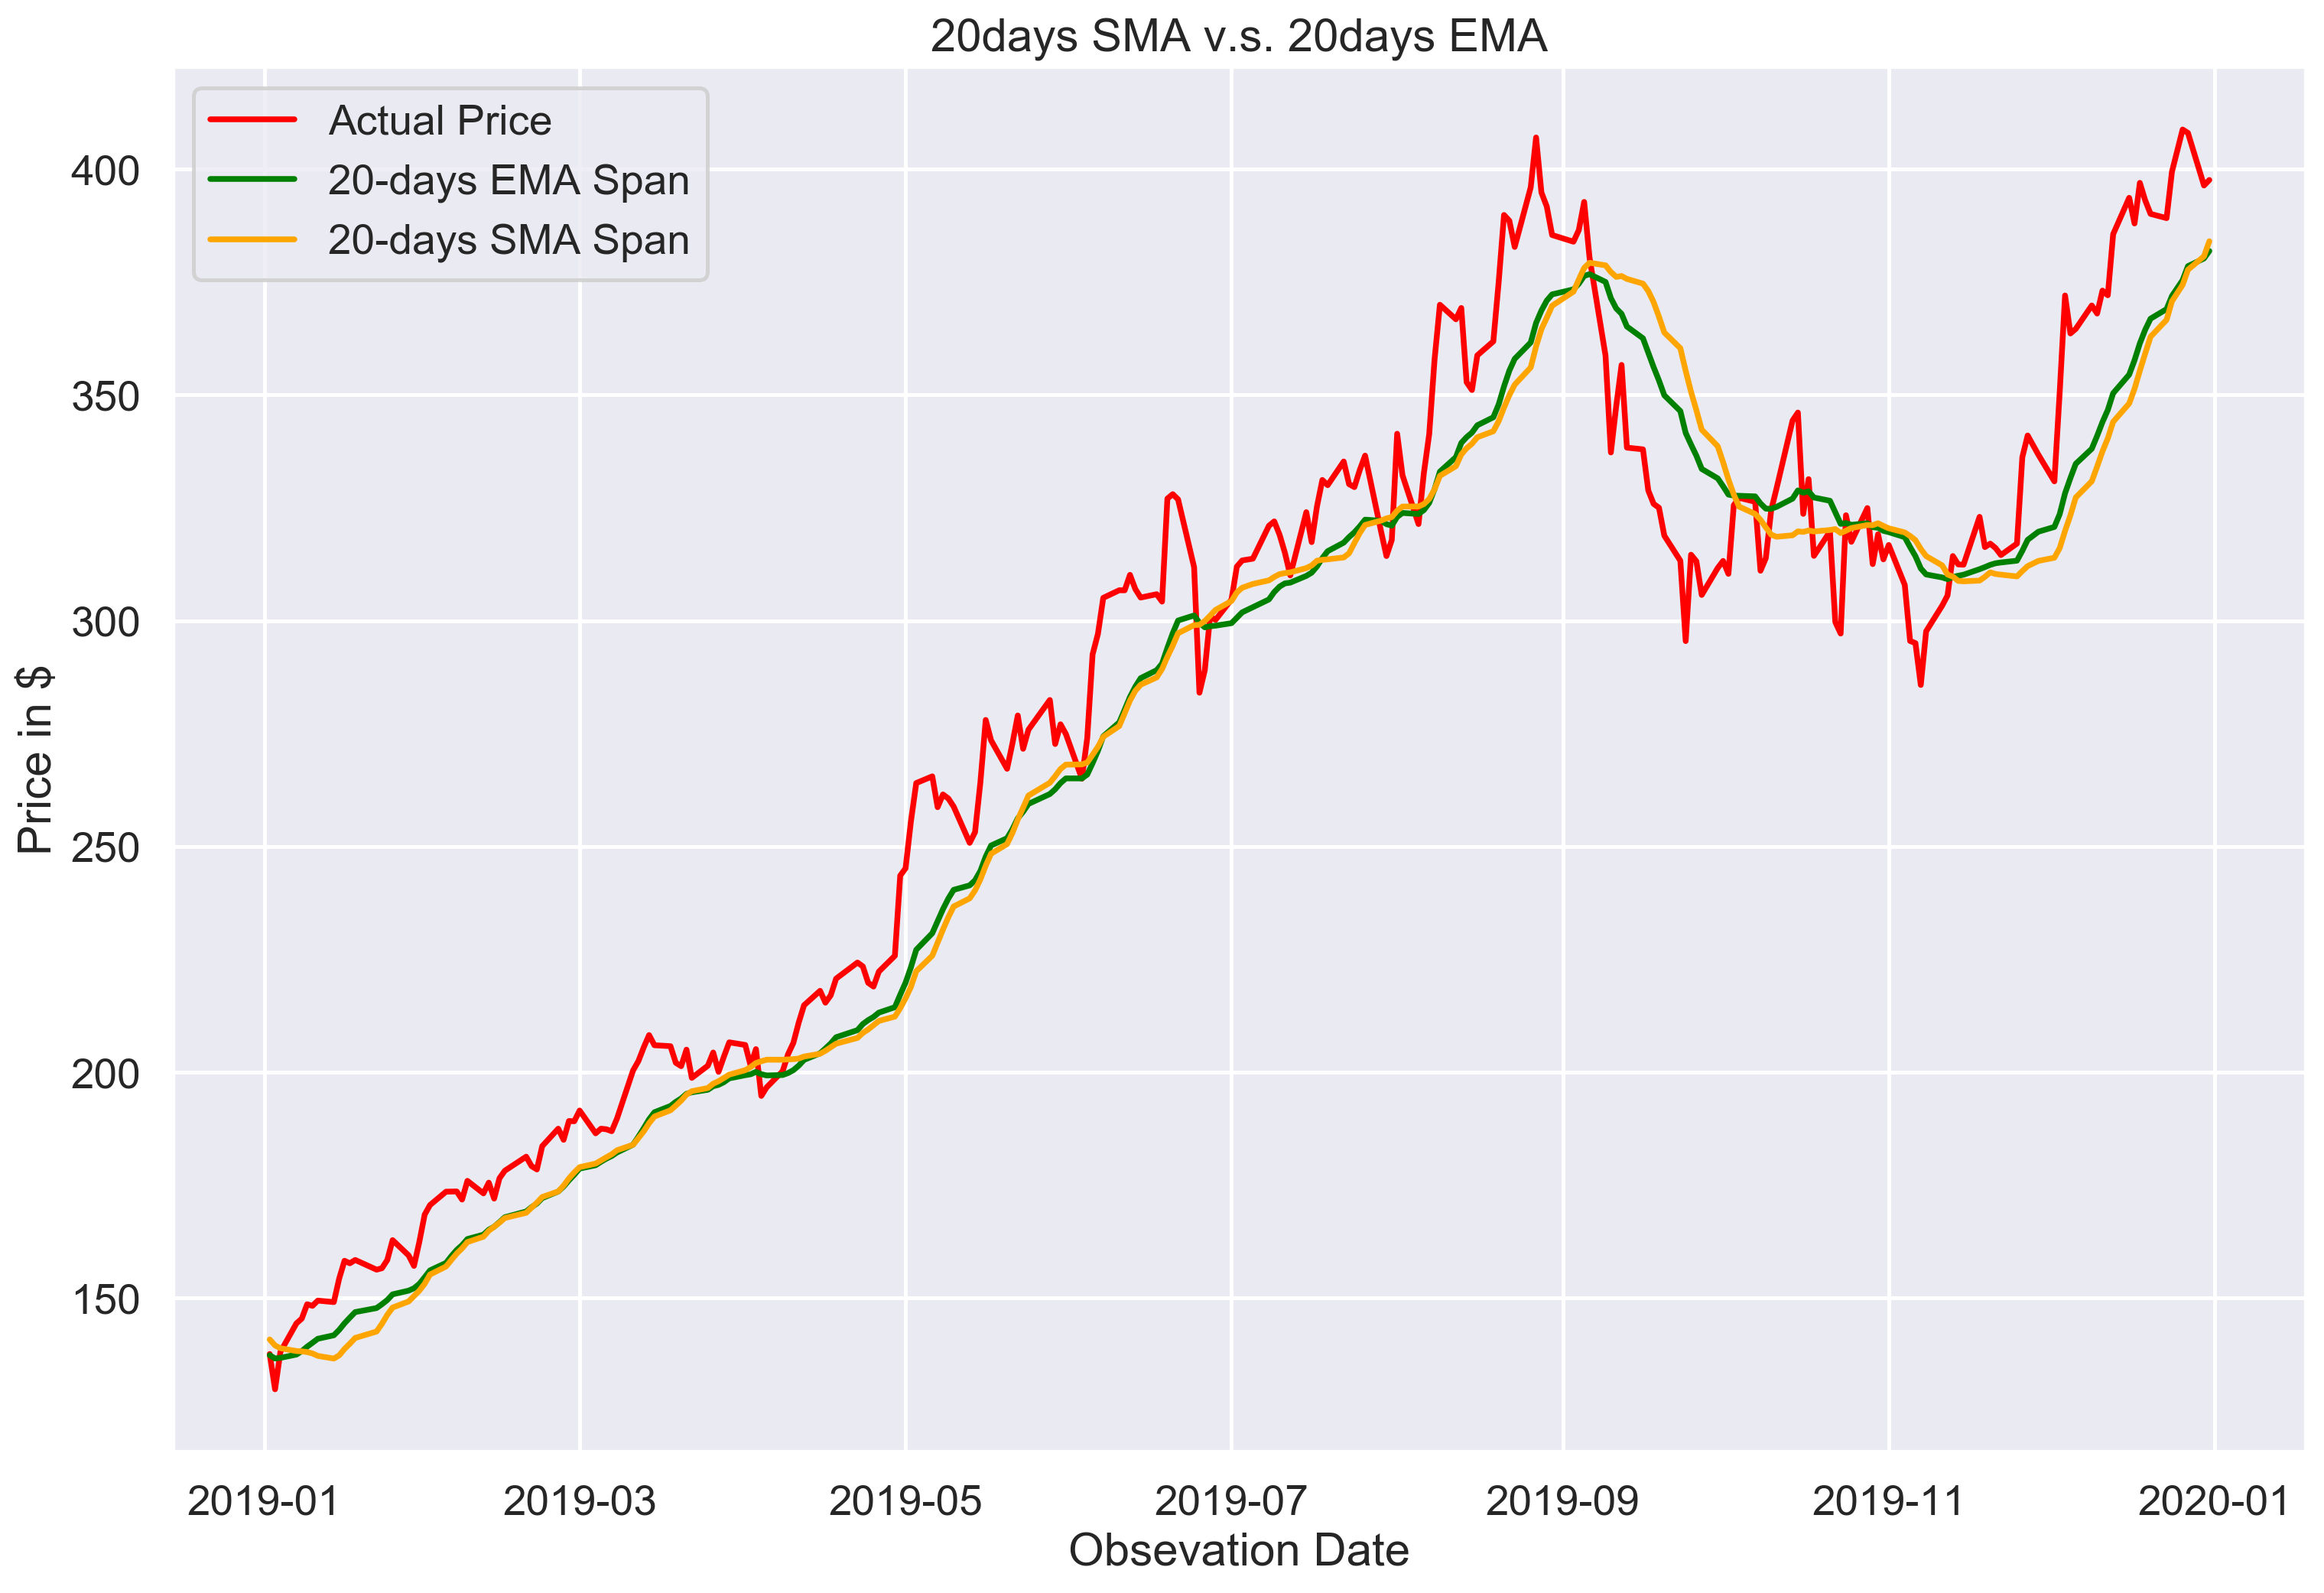

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(shop.loc[start_date:end_date, :].index, shop.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(shop_df.loc[start_date:end_date, :].index, shop_df.loc[start_date:end_date, '20d_sma'], label = '20-days SMA Span', color = 'orange')

ax.legend(loc='best')
ax.set_title('20days SMA v.s. 20days EMA')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

In [12]:
shop_new=pd.DataFrame()
shop_new['Actual Close'] = shop['Close']
shop_new['20days EMA Close'] = ema_20['Close']
shop_new.tail(20)

,Actual Close,20days EMA Close
Date,,
2019-12-03,350.660004,323.598509
2019-12-04,372.000000,328.208174
2019-12-05,363.589996,331.577872
2019-12-06,364.600006,334.722837
2019-12-09,369.790009,338.062568
2019-12-10,368.000000,340.913752
2019-12-11,373.079987,343.977203
2019-12-12,372.049988,346.650801
2019-12-13,385.570007,350.357392


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_shop = sqrt(mean_squared_error(shop_new['Actual Close'], shop_new['20days EMA Close']))
print('rmse_shop','=', rmse_shop)

rmse_shop = 9.873831862414923
